<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-задачи" data-toc-modified-id="Описание-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание задачи</a></span><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Ход-исполнения" data-toc-modified-id="Ход-исполнения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ход исполнения</a></span></li></ul></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-инструментов" data-toc-modified-id="Загрузка-инструментов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка инструментов</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая-подготовка" data-toc-modified-id="Общая-подготовка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общая подготовка</a></span></li><li><span><a href="#Стационарность-ряда" data-toc-modified-id="Стационарность-ряда-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Стационарность ряда</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Модели" data-toc-modified-id="Модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модели</a></span><ul class="toc-item"><li><span><a href="#Признаки" data-toc-modified-id="Признаки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Признаки</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#XBGRegressor" data-toc-modified-id="XBGRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>XBGRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#Константная-модель:-отстающие-значения" data-toc-modified-id="Константная-модель:-отстающие-значения-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Константная модель: отстающие значения</a></span></li><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>ARIMA</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Визуализация-предсказания" data-toc-modified-id="Визуализация-предсказания-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Визуализация предсказания</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

# ПРОГНОЗИРОВАНИЕ ЗАКАЗОВ ТАКСИ

## Описание задачи

### Постановка задачи

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. 

**Требование к модели:** значение метрики RMSE на тестовой выборке должно быть не больше 48.

### Ход исполнения

1. Загрузим данные и ресемплируем их по одному часу.
2. Проанализируем данные.
3. Обучим разные модели, используя тестовую выборку 10%.
4. Проверим модели на тестовой выборке.

## Обзор данных

### Загрузка инструментов

In [1]:
# установим пакеты
!pip install xgboost
!pip install catboost
!pip install tqdm

In [2]:
# загрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# импорт моделей
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from statsmodels.tsa.arima_model import ARIMA

# импорт утилит
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tqdm import tqdm

# импорт метрик
from sklearn.metrics import mean_squared_error

# импорт классов и пайплайнов
from sklearn.pipeline import Pipeline
from sklearn import set_config
from statsmodels.tsa.seasonal import seasonal_decompose

In C:\Users\1\anaconda3\envs\praktikum\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\1\anaconda3\envs\praktikum\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\1\anaconda3\envs\praktikum\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\1\anaconda3\envs\praktikum\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\1\anaconda3\envs\praktikum\lib\site-

In [3]:
# установим общие параметры для тетради
# оформление графиков
sns.set()

# вывод pipeline
set_config(display='diagram')

# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

### Описание данных

Данные представляют из себя временной ряд заказов такси. Более подробное изучим их на этапе анализа.

Датасет состоит из двух столбцов.
- Количество заказов находится в столбце `num_orders`.
- Время заказов находится в столбце `datetime`. 

### Загрузка данных

Сразу спарсим даты с колонки `datetime`, и используем ее в качестве индекса для наших данных.

In [4]:
# читаем файл и сохраняем в переменные дальнейшей работы, в том числе изменений
# используем оператор обработки исключений, чтобы избежать ошибки, при открытии данных,
# расположенных по другому адресу 
try: 
    df = pd.read_csv('/datasets/taxi.csv', 
                     parse_dates=['datetime'], index_col=['datetime'])
except:
    df = pd.read_csv('datasets/taxi.csv', 
                     parse_dates=['datetime'], index_col=['datetime'])
                         
# создадим дополнительные переменные, для контроля изменений    
try: 
    df_ctrl = pd.read_csv('/datasets/taxi.csv', 
                          parse_dates=['datetime'], index_col=['datetime'])
except:
    df_ctrl = pd.read_csv('datasets/taxi.csv', 
                          parse_dates=['datetime'], index_col=['datetime'])

In [5]:
# проверим работу данных
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


Изучим данные более внимательно.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


**Итоги:**

1. Данные загружены и функционируют нормально.
2. Содержание колонок соответствует описанию данных.
3. В данных отсутствуют явные проблемы.

## Анализ данных

### Общая подготовка

Так как явных проблем в данных не обнаружено, подготовим их для работы.

Сперва проверим хронологический порядок расположения.

In [7]:
print(df.index.is_monotonic)

True


Проверим период за который предоставлены данные.

In [8]:
max_date = df.index.max()
min_date = df.index.min()
print(f'Данные представлены за период c {min_date} по {max_date}')

Данные представлены за период c 2018-03-01 00:00:00 по 2018-08-31 23:50:00


Ресемплируем данные по 1 часу. В качестве описательной статистики используем сумму.

In [9]:
dfh = df.resample('1H').sum()
print(f'Количество наблюдений в оригинальных данных: {len(df)}.')
print(f'Количество наблюдений в ресемплированных данных, с периодом в 1 час: {len(dfh)}.')

Количество наблюдений в оригинальных данных: 26496.
Количество наблюдений в ресемплированных данных, с периодом в 1 час: 4416.


Сделаем первичный визуальный обзор данных.

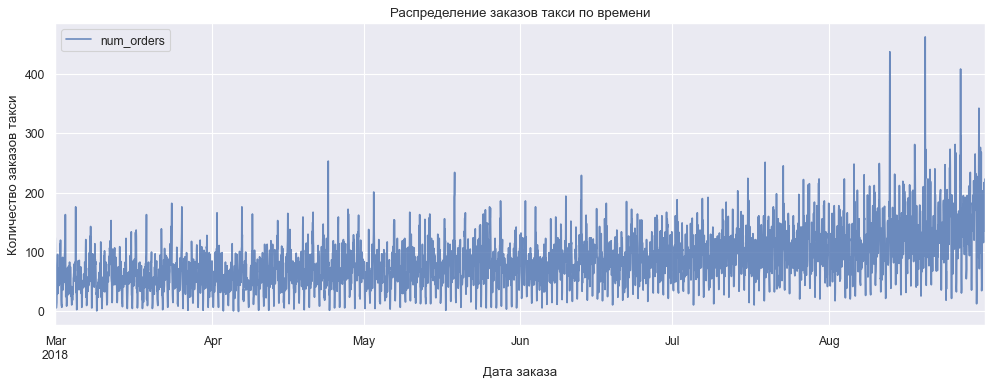

In [10]:
plt.figure(figsize=(15, 5), dpi=80)
ax = dfh.plot(ax=plt.gca(), alpha=.8)
ax.set(title='Распределение заказов такси по времени', 
       ylabel='Количество заказов такси',
       xlabel='Дата заказа');

Проверим наличие тренда и сезонности. Для этого ресемплируем данные еще раз.

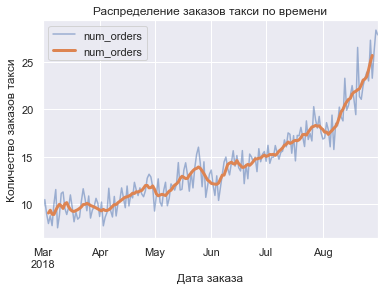

In [11]:
trend = df.resample('1D').mean().rolling(
    # окно 7, чтобы захватить всю неделю
    window=7,
    center=True    
).mean()

# график
ax = df.resample('1D').mean().plot(alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)
ax.set(title='Распределение заказов такси по времени', 
       ylabel='Количество заказов такси',
       xlabel='Дата заказа');

Разложим данные для изучения тренда, сезонности и шума.

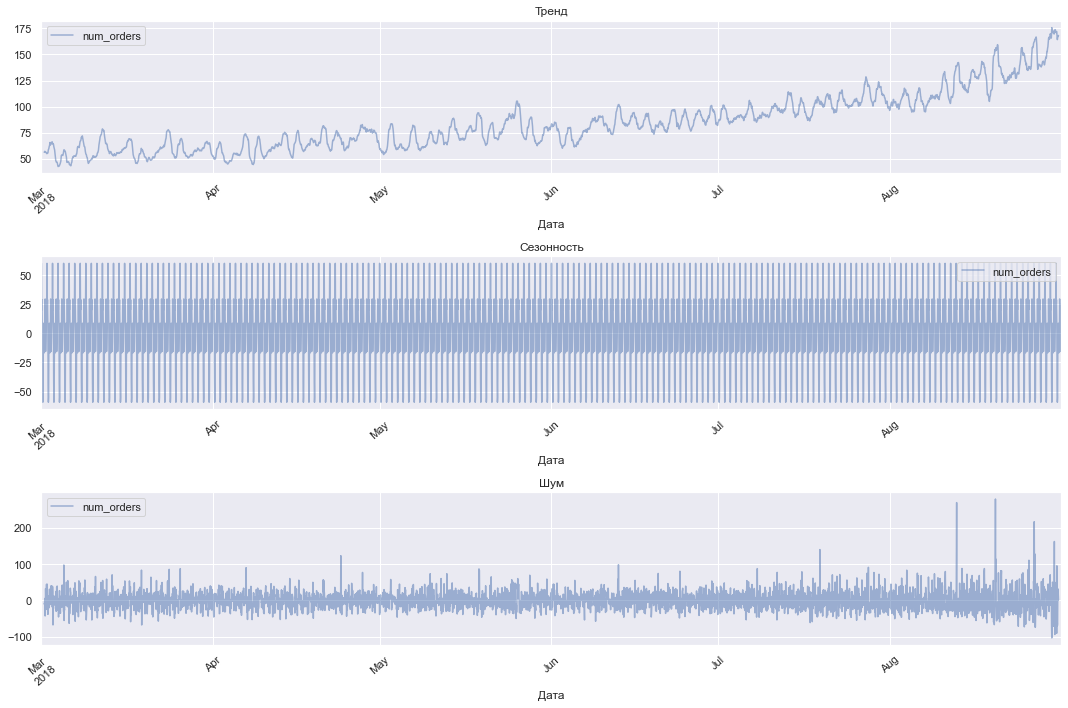

In [12]:
decomposed = seasonal_decompose(dfh)
plt.figure(figsize=(15, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), alpha=.5)
plt.title('Тренд')
plt.xticks(rotation=42)
plt.xlabel('Дата')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca(), alpha=.5) 
plt.title('Сезонность')
plt.xticks(rotation=42)
plt.xlabel('Дата')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca(), alpha=.5) 
plt.title('Шум')
plt.xticks(rotation=42)
plt.xlabel('Дата')

plt.tight_layout()

Сезонность в рамках всего периода отсутствует. Изучим более крупно данные, на примере 3 последних месяцев.

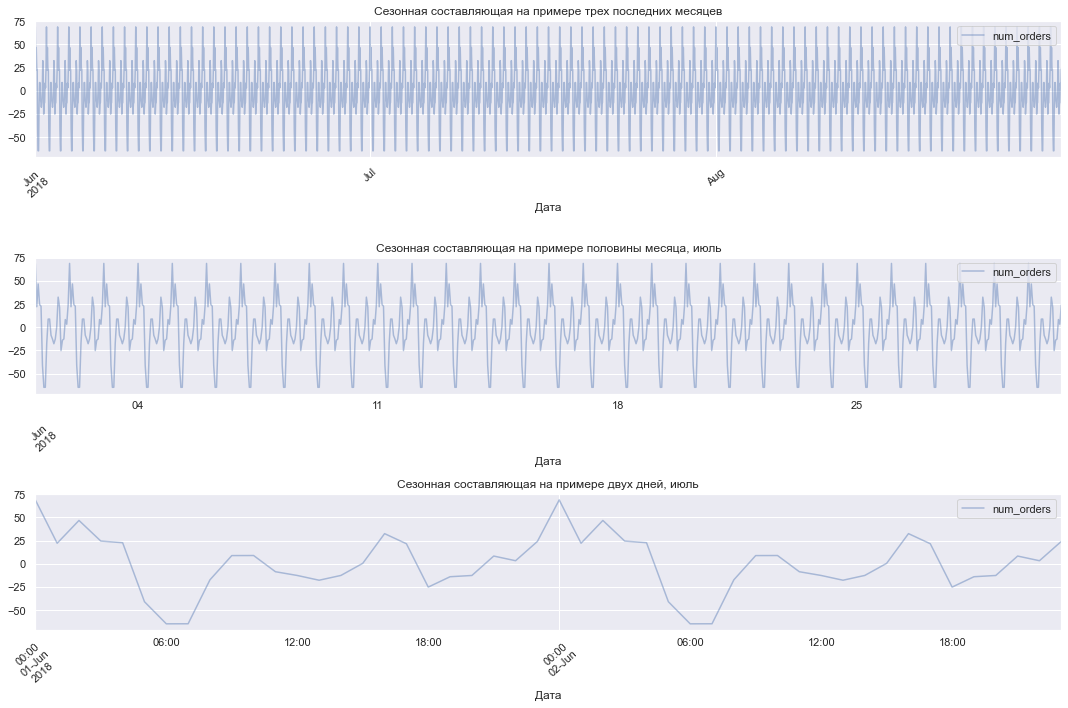

In [13]:
plt.figure(figsize=(15, 10))
filtered = dfh['2018-06':]
decomposed = seasonal_decompose(filtered)

plt.subplot(311)
decomposed.seasonal['2018-06':].plot(ax=plt.gca(), alpha=.42)
plt.xlabel('Дата')
plt.xticks(rotation=42)
plt.title('Сезонная составляющая на примере трех последних месяцев')

plt.subplot(312)
decomposed.seasonal['2018-06-01':'2018-06-30'].plot(ax=plt.gca(), alpha=.42)
plt.title('Сезонная составляющая на примере половины месяца, июль')
plt.xticks(rotation=42)
plt.xlabel('Дата')

plt.subplot(313)
decomposed.seasonal['2018-06-01':'2018-06-02'].plot(ax=plt.gca(), alpha=.42)
plt.title('Сезонная составляющая на примере двух дней, июль')
plt.xticks(rotation=42)
plt.xlabel('Дата')


plt.tight_layout()

**Итоги:**

1. Данные были ресемплированы с новым периодом в 1 час (количество уменьшилось до 4416). 
2. Предварительный визуальный анализ позволяет сделать предположение о наличии тренда увеличения количества заказов со временем.
3. Годовая или месячная сезонность отсутствует. Однако можно делать вывод о наличии внутрисуточной сезонности, что связано с рабочим режимом. С 6 утра начинается рост заказов, после полуночи начинается падение

### Стационарность ряда

Необходимым условием успешного предсказания является стационарность ряда. Проверим наш ряд на стационарность.

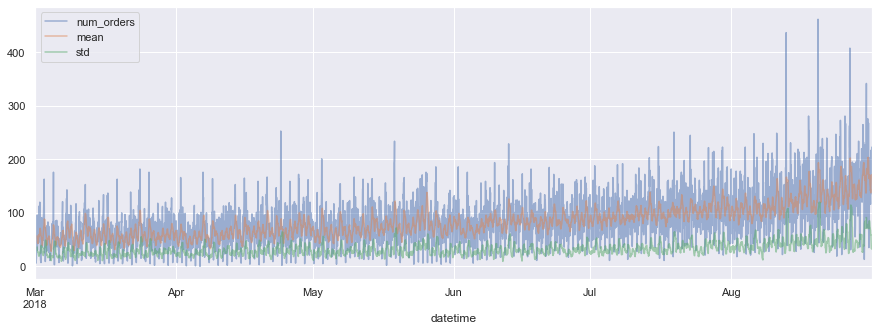

In [14]:
plt.figure(figsize=(15, 5))
dfh['mean'] = dfh['num_orders'].rolling(12).mean()
dfh['std'] = dfh['num_orders'].rolling(12).std()
dfh.plot(ax=plt.gca(), alpha=.5) 
plt.show()

Визуально заметны небольшие колебания среднего и стандартного отклонения. Проведем дифференциальное преобразование.

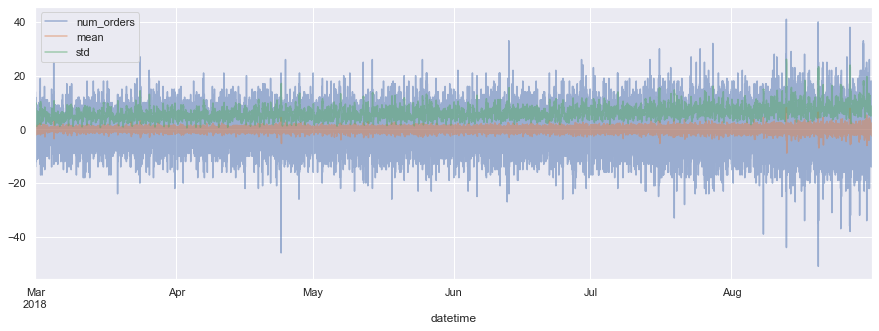

In [15]:
dfh_shift = df.copy()
plt.figure(figsize=(15, 5))
dfh_shift['num_orders'] = dfh_shift - dfh_shift.shift()
dfh_shift['mean'] = dfh_shift['num_orders'].rolling(12).mean()
dfh_shift['std'] = dfh_shift['num_orders'].rolling(12).std()
dfh_shift.plot(ax=plt.gca(), alpha=.5) 
plt.show()

Удалим строки с отсутствующими значениями.

In [16]:
print('Количество строк с пропусками:', dfh.isna().sum())
dfh = dfh.dropna().drop(columns=['std', 'mean'])

Количество строк с пропусками: num_orders     0
mean          11
std           11
dtype: int64


### Выводы

При исследовании рядам, мы обнаружили восходящий месячный тренд, а также суточную сезонность. Путем простого дифференцирования добились большей стационарности ряда. Кроме того, мы подготовили два дополнительных синтетических признака: скользящее среднее и скользящее стандартное отклонение, с окном в 12 часов.

## Модели

### Признаки

Перед обучением моделей, подготовим все необходимые дополнительные признаки.

In [17]:
class FeatureSlave():
    '''Класс FeatureSlave служит для добавления признаков в датасет временного ряда
       Класс принимает: отстающие значения и шаг скользящего среднего.
       Метод fit класса принимает датасет data для обучения.
       Метод transform класса принимает датасет data для преобразования.
    '''

 
    def __init__(self, max_lag, rolling_mean_size):
        self.max_lag = max_lag
        self.rolling_mean_size = rolling_mean_size

    def fit(self, data, y=None):
        return self
    
    def transform(self, data, y=None):
        data['year'] = data.index.year
        data['month'] = data.index.month
        data['day'] = data.index.day
        data['dayofweek'] = data.index.dayofweek
       
        for lag in range(1, self.max_lag + 1):
            data[f'lag_{lag}'] = data['num_orders'].shift(lag)
        
        for rolling_average in range(5, self.rolling_mean_size + 1, 5):
            data[f'rolling_average_{rolling_average}'] = data['num_orders'].rolling(
                window=rolling_average).mean()
        
        return data   

In [18]:
feat_slave = FeatureSlave(3, 15)
data = feat_slave.transform(dfh)

# результат
data.head()

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,rolling_average_5,rolling_average_10,rolling_average_15
datetime,,,,,,,,,,,
2018-03-01 11:00:00,96,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 12:00:00,30,2018,3,1,3,96.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 13:00:00,32,2018,3,1,3,30.0,96.0,NaN,NaN,NaN,NaN
2018-03-01 14:00:00,48,2018,3,1,3,32.0,30.0,96.0,NaN,NaN,NaN
2018-03-01 15:00:00,66,2018,3,1,3,48.0,32.0,30.0,54.4,NaN,NaN


- `year` не меняется за весь период ряда, поэтому не пригодится для исследования.
- `month` сохраняет свою информацию, благодаря нарастающему тренду, кроме того, при отсутствии месячной сезонности (из-за периода ряда), также признак может зашумить результаты.
- При этом `day` может непосредственно влиять на количество заказов. В середине и начале месяца, когда люди получают аванс/зарплату, они склонны больше тратить. А в конце месяца - больше экономить и меньше ездить на такси.

Избавимся от признаков `year` и `month`. 

In [19]:
# посмотрим на результат и избавимся от пропусков
print('Количество строк с пропусками:', data.isna().sum().max())
data = data.dropna().drop(columns=['year', 'month'])

Количество строк с пропусками: 14


Подготовим наборы.

In [20]:
target = ['num_orders']
features = data.columns.drop(target)

In [21]:
X = data[features]
y = data[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.1)

In [23]:
# создадим список наборов
data_list = [X_train, X_test, y_train, y_test]

In [24]:
# проверим длину наборов и монотонность возрастания индексов
for set in data_list:
    print(len(set))
    print(set.index.is_monotonic)
    print()

3951
True

440
True

3951
True

440
True



**Итоги:**

Были подготовлены признаки следующих групп:
1. Синтетические описательные статистики (среднее и стандартное отклонение).
2. Календарные (год, месяц, день и день недели).
3. Отстающие значения.
4. Скользящее среднее.

Были подготовлены обучающий и тестовый набор (размер тестового 10%), а также выделены признаки и целевой признак.

Можно переходить к обучению и сравнению моделей. Для этого подготовим словарь для хранения оценок моделей.

In [25]:
models_score = {}
models_score['model_name'] = []
models_score['train_score'] = []
models_score['test_score'] = []

А также функцию обучения и оценки модели.

In [26]:
# определим функцию оценки
def ml_slave(mod, data_list, score_list, best_params=False):
    '''
    Функция принимает разные модели в параметры.
    mod - вид модели;
    data_list - список, содержащий датасеты для обучения модели [X_train, X_test, y_train, y_test];
    score_list - список, собирающий оценки модели;
    best_params - список, куда сохраняются лучшие настройки гиперпараметров модели,
    значение по умолчанию None.
       
    '''
    # обучим модель
    model = mod.fit(data_list[0], data_list[2]) 
    models_score['model_name'].append(model.__class__.__name__)
    
    # предскажем на учебном наборе
    train_pred = model.predict(data_list[0])
    rmse = round(mean_squared_error(data_list[2], train_pred, squared=False), 2)
       
    # сохраним оценки для анализа
    models_score['train_score'].append(rmse)
    
    # выведем метрики
    print(f'RMSE модели {model.__class__.__name__} на train сете: {rmse}')
    print('-' * 45)
    
    # предскажем на тестовом наборе
    test_pred = model.predict(data_list[1])
    rmse = round(mean_squared_error(data_list[3], test_pred, squared=False), 2) 
           
    # сохраним оценки для анализа
    models_score['test_score'].append(rmse)
    
    # выведем метрики
    print(f'RMSE модели {model.__class__.__name__} на test сете: {rmse}')
    print('-' * 45)
    
    # техническая разметка
    print('=' * 45)
    print()  
    
    if best_params:
        best_params.append(model.best_params_)
        print(f'Оценка достигнута при параметрах: {best_params[0]}')

### LinearRegression

In [27]:
lr_model = LinearRegression()

In [28]:
ml_slave(lr_model, data_list, models_score)

RMSE модели LinearRegression на train сете: 22.1
---------------------------------------------
RMSE модели LinearRegression на test сете: 37.03
---------------------------------------------



### XBGRegressor

In [29]:
XGBR_model = RegressorChain(base_estimator=XGBRegressor())

In [30]:
ml_slave(XGBR_model, data_list, models_score)

RMSE модели RegressorChain на train сете: 8.12
---------------------------------------------
RMSE модели RegressorChain на test сете: 51.1
---------------------------------------------



### RandomForestRegressor

In [31]:
RFR_model = RandomForestRegressor(random_state=42)

In [32]:
ml_slave(RFR_model, data_list, models_score)

RMSE модели RandomForestRegressor на train сете: 8.52
---------------------------------------------
RMSE модели RandomForestRegressor на test сете: 47.28
---------------------------------------------



### CatBoostRegressor

In [33]:
cb_model = CatBoostRegressor(iterations=100, learning_rate=0.25, 
                              verbose=20, random_seed=42)

In [34]:
ml_slave(cb_model, data_list, models_score)

0:	learn: 34.9314180	total: 138ms	remaining: 13.7s
20:	learn: 23.1835793	total: 191ms	remaining: 719ms
40:	learn: 20.8404567	total: 246ms	remaining: 353ms
60:	learn: 19.0537647	total: 297ms	remaining: 190ms
80:	learn: 17.8683936	total: 351ms	remaining: 82.4ms
99:	learn: 16.9621719	total: 386ms	remaining: 0us
RMSE модели CatBoostRegressor на train сете: 16.96
---------------------------------------------
RMSE модели CatBoostRegressor на test сете: 46.72
---------------------------------------------



### Константная модель: отстающие значения

Используем для sanity check константное значение - значение предыдущего периода.

In [35]:
models_score['model_name'].append('ConstantLagModel')

In [36]:
# на учебном наборе
pred_previous = data_list[2].shift().dropna()
true_y = data_list[2].iloc[1:]
rmse = round(mean_squared_error(true_y, pred_previous, squared=False), 2)
models_score['train_score'].append(rmse)
print(f'RMSE константной модели на train сете: {rmse}')

RMSE константной модели на train сете: 36.2


In [37]:
# на тестовом наборе
pred_previous = data_list[3].shift().dropna()
true_y = data_list[3].iloc[1:]
rmse = round(mean_squared_error(true_y, pred_previous, squared=False), 2)
models_score['test_score'].append(rmse)
print(f'RMSE константной модели на test сете: {rmse}')

RMSE константной модели на test сете: 58.93


### ARIMA

В качестве дополнительного эксперимента, обучим модель класса ARIMA и проверим ее эффективность на тестовых данных.

Перед обучением, проверим ряд на стационарность критерием Дики-Фуллера и подберем параметры ARIMA (p, d, q).

$H_0$ ряд имеет единичный корень и не является стационарным.
$H_1$ ряд является стационарным.

In [38]:
arima_df = dfh['num_orders']

In [39]:
print('p-value:', adfuller(arima_df.dropna())[1])

p-value: 0.030929992447648644


Отвергаем нулевую гипотезу, ряд является cтационарным, p_value < 0.05.

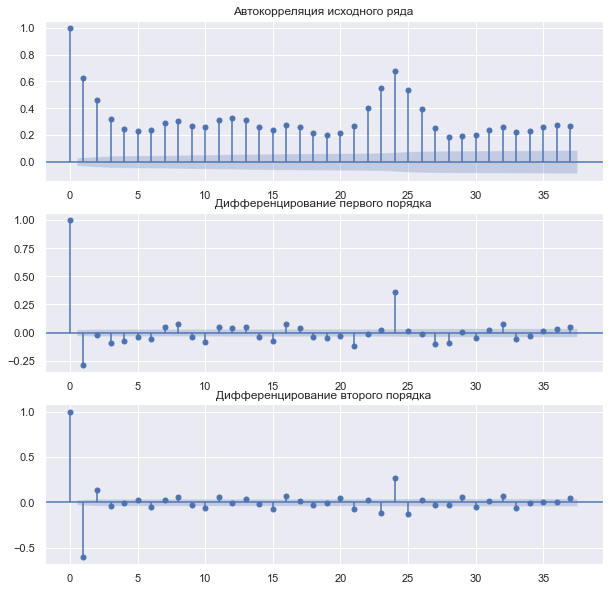

In [40]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(311)
fig = plot_acf(arima_df, ax=ax1,
               title='Автокорреляция исходного ряда') 
ax2 = fig.add_subplot(312)
fig = plot_acf(arima_df.diff().dropna(), ax=ax2, 
               title='Дифференцирование первого порядка')
ax3 = fig.add_subplot(313)
fig = plot_acf(arima_df.diff().diff().dropna(), ax=ax3, 
               title='Дифференцирование второго порядка')

Принимаем d = 0.

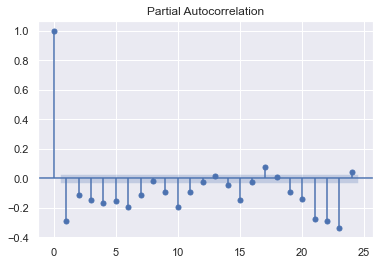

In [41]:
plot_pacf(arima_df.diff().dropna(), lags=24)
plt.show()

p = 23. Но для обеспечения скорости расчета, ставим второй по значимости, а именно номер несезонного лага = 1.

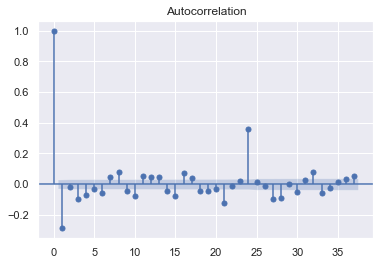

In [42]:
plot_acf(arima_df.diff().dropna())
plt.show()

Количество сильно отличных от нуля коэффициентов на автокоррелограмме равно 2. Используем их, как самые значимые, остальные примем за колебания.

q=2

100%|██████████| 441/441 [04:04<00:00,  1.81it/s]


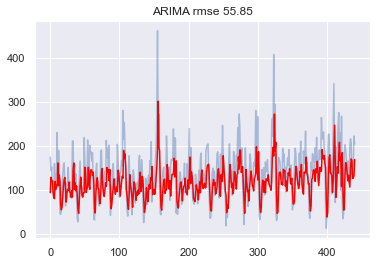

In [43]:
X = dfh[['num_orders']].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(1, 0, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    y_pred = output[0]
    predictions.append(y_pred)
    obs = test[t]
    history.append(obs)


rmse = round(mean_squared_error(test, predictions, squared=False), 2)

plt.plot(test, alpha=.42)
plt.plot(predictions, color='red')
plt.title(f'ARIMA rmse {rmse}')
plt.show()

## Анализ моделей

Выведем оценки всех моделей для изучения.

In [44]:
score_table = pd.DataFrame(models_score)
score_table.style.highlight_min('test_score', color = 'green', axis = 0)

,model_name,train_score,test_score
0,LinearRegression,22.100000,37.030000
1,RegressorChain,8.120000,51.100000
2,RandomForestRegressor,8.520000,47.280000
3,CatBoostRegressor,16.960000,46.720000
4,ConstantLagModel,36.200000,58.930000


По результатам обучения 5 моделей, на тестовой выборке лучший результат показала Линейная регрессия. Модели более сложного порядка - переобучились (rmse 7.36 на учебном наборе для XGBRegressor!).

Изучим результаты предсказания LinearRegression.

### Feature importance 

In [45]:
lr_feature_importance = pd.DataFrame(
    lr_model.coef_, columns=X_train.columns).T.reset_index().sort_values(
    by=0).rename(columns={'index': 'feature', 0: 'importance'})

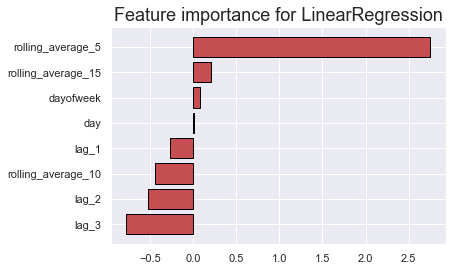

In [46]:
plt.barh(lr_feature_importance['feature'], 
         lr_feature_importance['importance'], 
         edgecolor='black', color='r')

plt.title('Feature importance for LinearRegression', fontsize=18)
plt.show()

### Визуализация предсказания

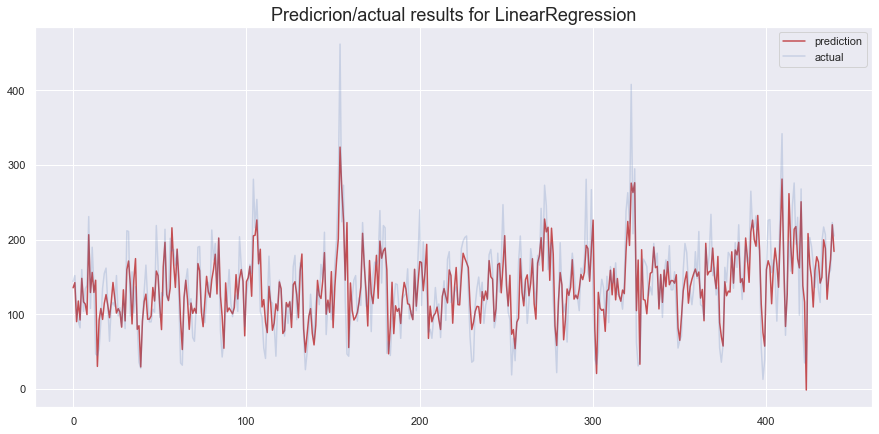

In [47]:
pred = lr_model.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(pred, 'r', label='prediction')
plt.plot(y_test.values, label='actual', alpha=.21)
plt.legend(loc='best')
plt.title('Predicrion/actual results for LinearRegression', fontsize=18)
plt.show()

Изучим остатки, для анализа эффективности модели.

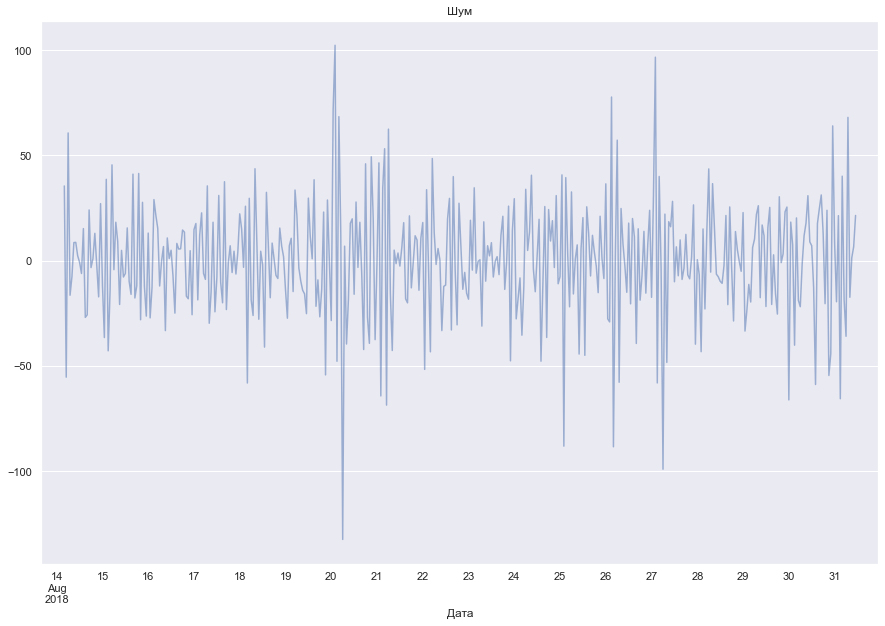

In [48]:
df_pred = pd.DataFrame(pred, index=X_test.index)
resid = y_test['num_orders'] - df_pred[0]
decomposed_pred = seasonal_decompose(resid)

plt.figure(figsize=(15, 10))

decomposed_pred.resid.plot(ax=plt.gca(), alpha=.5, label='pred_resid') 

plt.title('Шум')
plt.xticks(rotation=42)
plt.xlabel('Дата')
plt.show()

В остатках визуально отсутствует структура. Можно предположить, что модель выбрала всю полезную информацию.

Проверим остатки на нормальность.

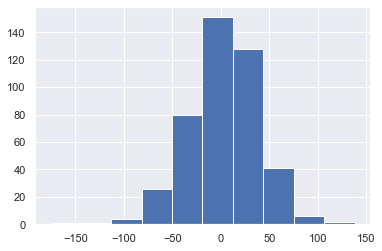

In [49]:
resid.hist();

По этому параметру модель также выглядит функциональной.

Проверим постоянство дисперсии на всем протяжении моделей. Остатки должны быть независимы от предсказанных данных.

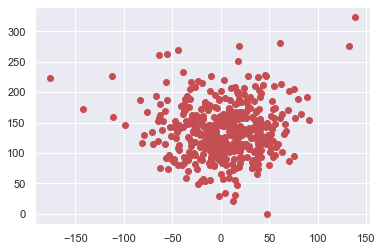

In [50]:
plt.plot(np.array(resid.reset_index()[0]), np.array(df_pred[0]), 'o', color='r');

Это свойство также выполняется.

Проверим автокорреляцию остатков.

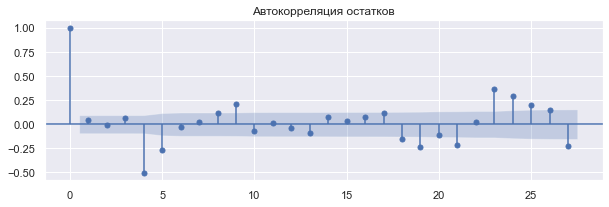

In [51]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(311)
fig = plot_acf(resid, ax=ax1,
               title='Автокорреляция остатков') 

Здесь мы наблюдаем проблему. У остатков есть автокоррелирующая зависимость. 

**Итоги:**

Модель показывает себя достаточно адекватно, однако может быть улучшена. Почти вся полезная информация выбрана, однако в шуме есть остаточная автокорреляция, которую можно учесть дополнительной настройкой, в случае необходимости.

### Выводы

По результатам проведенного исследования, наилучший результат показала модель LinearRegression. При этом все модели прошли sanity check, основанный на константной модели отстающих значений на 1 точку.

Более сложные модели переобучились и демонстрировали гораздо более лучшую оценку на обучающем набору и худшую на тестовом.